In [1]:
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
from pathlib import Path
csvpath = Path("../Project 2/Resources/LTC_USD.csv")
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-07-20,LTC,107.272042,113.153208,115.042202,104.094588
2021-07-21,LTC,117.109194,107.330562,119.184707,105.153298
2021-07-22,LTC,119.913432,117.701875,122.081390,115.738590
2021-07-23,LTC,122.269072,120.707185,122.339452,117.134287
2021-07-24,LTC,124.637360,124.290013,127.480713,123.435597


<AxesSubplot:xlabel='Date'>

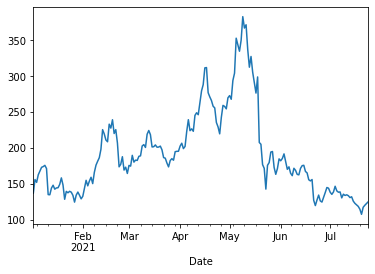

In [3]:
df["Closing Price (USD)"].plot()

<AxesSubplot:xlabel='Date'>

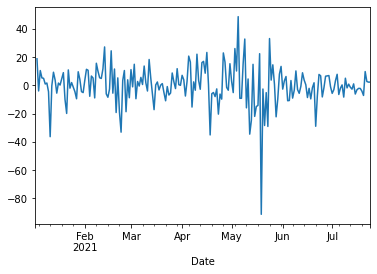

In [4]:
# Differencing the Settle price stationarizes the time series
df["Closing Price (USD)"].diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

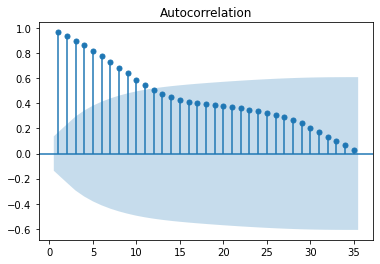

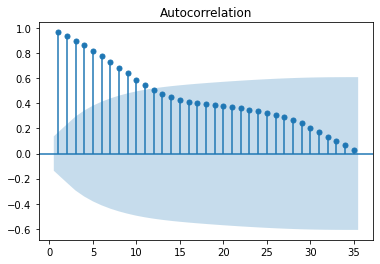

In [6]:
# Plot the autocorrelation of the Settle Prices
plot_acf(df["Closing Price (USD)"], zero=False, lags=35)

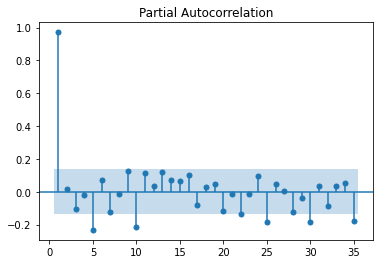

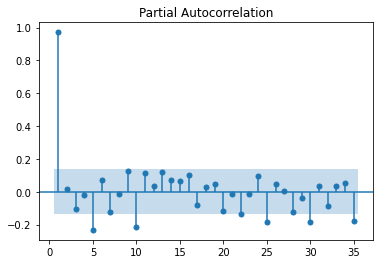

In [7]:
# Plot the partial autocorrelation of the returns
plot_pacf(df["Closing Price (USD)"], zero=False, lags=35)

# ARIMA Model

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
# Create an ARIMA model
model = ARIMA(df["Closing Price (USD)"].values, order=(12, 1, 0))

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
# Fit the model to the data
results = model.fit()

In [11]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                ARIMA(12, 1, 0)   Log Likelihood                -806.899
Method:                       css-mle   S.D. of innovations             12.851
Date:                Tue, 03 Aug 2021   AIC                           1641.799
Time:                        19:35:53   BIC                           1688.184
Sample:                             1   HQIC                          1660.564
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0207      0.913     -0.023      0.982      -1.810       1.769
ar.L1.D.y      0.0378      0.069      0.544      0.587      -0.098       0.174
ar.L2.D.y      0.0269      0.069      0.388      0.698      -0.109       0.162
ar.L3.D.y     -0.0034      0.069     -0.050      0.960      -0.138       0.131
ar.L4.D.y      0.2244      0.068      3.288      0.001       0.091       0.358
ar.L5.D.y     -0.1247      0.070     -1.787      0.074      -0.261       0.012
ar.L6.D.y      0.1570      0.070      2.238      0.025       0.019       0.295
ar.L7.D.y     -0.0361      0.070     -0.519      0.604      -0.173       0.100
ar.L8.D.y     -0.1064      0.069     -1.542      0.123      -0.242       0.029
ar.L9.D.y      0.1235      0.069      1.801      0.072      -0.011       0.258
ar.L10.D.y    -0.1260      0.069     -1.824      0.068      -0.261       0.009
ar.L11.D.y    -0.0322      0.070     -0.461      0.645      -0.169       0.105
ar.L12.D.y    -0.1392      0.070     -2.001      0.045      -0.275      -0.003
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0786           -0.2721j            1.1124           -0.0393
AR.2             1.0786           +0.2721j            1.1124            0.0393
AR.3             0.8062           -0.8672j            1.1840           -0.1308
AR.4             0.8062           +0.8672j            1.1840            0.1308
AR.5             0.2511           -1.1309j            1.1585           -0.2152
AR.6             0.2511           +1.1309j            1.1585            0.2152
AR.7            -1.0623           -0.2494j            1.0912           -0.4633
AR.8            -1.0623           +0.2494j            1.0912            0.4633
AR.9            -0.4331           -1.1289j            1.2092           -0.3083
AR.10           -0.4331           +1.1289j            1.2092            0.3083
AR.11           -0.7559           -1.0959j            1.3314           -0.3461
AR.12           -0.7559           +1.0959j            1.3314            0.3461
------------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

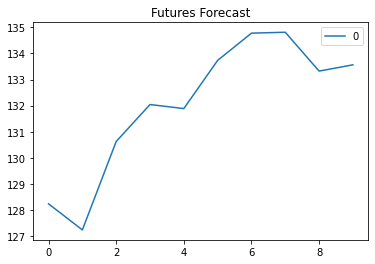

In [12]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [13]:
# save model
results.save('ltc_model1.pkl')

# ARIMA Model using a Lag of 2

In [34]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df["Closing Price (USD)"].values, order=(10, 1, 1))
results2 = model2.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mode

In [31]:
# print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                 ARIMA(9, 1, 1)   Log Likelihood                -809.418
Method:                       css-mle   S.D. of innovations             13.021
Date:                Tue, 03 Aug 2021   AIC                           1642.836
Time:                        20:09:24   BIC                           1682.595
Sample:                             1   HQIC                          1658.921
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0195      1.184     -0.016      0.987      -2.340       2.301
ar.L1.D.y     -0.5460      0.227     -2.405      0.016      -0.991      -0.101
ar.L2.D.y      0.0700      0.079      0.888      0.375      -0.085       0.224
ar.L3.D.y      0.0193      0.080      0.240      0.810      -0.138       0.177
ar.L4.D.y      0.2307      0.079      2.922      0.003       0.076       0.385
ar.L5.D.y      0.0107      0.096      0.111      0.911      -0.177       0.199
ar.L6.D.y      0.0596      0.081      0.740      0.459      -0.098       0.217
ar.L7.D.y      0.0352      0.082      0.429      0.668      -0.126       0.196
ar.L8.D.y     -0.1606      0.078     -2.051      0.040      -0.314      -0.007
ar.L9.D.y      0.0506      0.091      0.556      0.578      -0.128       0.229
ma.L1.D.y      0.5983      0.219      2.733      0.006       0.169       1.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0716           -0.2467j            1.0996           -0.4640
AR.2           -1.0716           +0.2467j            1.0996            0.4640
AR.3           -0.5252           -1.0626j            1.1853           -0.3231
AR.4           -0.5252           +1.0626j            1.1853            0.3231
AR.5            0.3381           -1.2778j            1.3218           -0.2088
AR.6            0.3381           +1.2778j            1.3218            0.2088
AR.7            1.5183           -0.4506j            1.5838           -0.0459
AR.8            1.5183           +0.4506j            1.5838            0.0459
AR.9            2.6566           -0.0000j            2.6566           -0.0000
MA.1           -1.6714           +0.0000j            1.6714            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

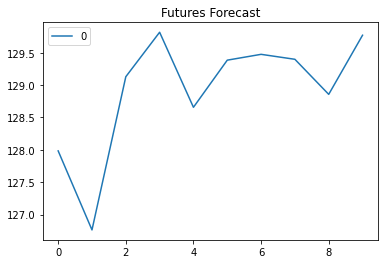

In [32]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [33]:
# save model
results2.save('ltc_model2.pkl')